<a href="https://colab.research.google.com/github/Rerina/Artificial_intelligence_and_database_systems/blob/main/PracticalWork4_SaliyEA_XEBO_04_23_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Дисциплина "Искусственный интеллект"**

# **Рабочая тетрадь №4**

**Регрессия** – это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение зависимой переменной у, при регрессионной связи одному и тому же значению независимой переменной (фактору) x могут соответствовать в зависимости от конкретного случая различные значения зависимой переменной (отклика) у.

Изучение регрессии основано на том, что случайные величины Х и Y связаны между собой вероятностной зависимостью: при каждом конкретном значении X=x величина Y является случайной величиной с вполне определённым распределением вероятностей. Зависимость зависимой переменной – отклика от одной независимой переменной – фактора или нескольких факторов называется уравнением регрессии. По количеству факторов выделяют парную (однофакторную) и множественную (многофакторную) регрессию. *Для парной будем рассматривать следующие методы регрессии: линейную, показательную, экспоненциальную, гиперболическую и параболическую.*

**Регрессионный анализ** – это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным. Цель регрессионного анализа состоит в определении общего вида уравнения регрессии, вычислении оценок неизвестных параметров, входящих в уравнение регрессии проверке статистических гипотез о регрессионной связи.

Таким образом, **регрессионный анализ** – набор статистических методов исследования влияния одной или нескольких независимых переменных X_1,…,X_n на зависимую переменную Y. Независимые переменные иначе называют регрессорами или предикторами, а зависимые переменные – критериальными переменными.

# **1.1. Теоретический материал – Линейные регрессионные модели**

**Линейная регрессия**

**Линейная регрессия** (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

**Цель линейной регрессии** — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть f (x) = b +m⋅x +, где m – наклон линии, а b – его сдвиг.

**Функция потерь — метод наименьших квадратов**

**Функция потерь** – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением.
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

**Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:

**numpy - numpy.linalg.lstsq**

**scipy - scipy.linalg**(содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).



## **1.1.1 Пример**

**Задача: **


Проведем прямую y = mx + b  через экспериментальные точки.

**Решение:**

In [4]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]
# Построим A по x:

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [7]:
# Используем метод lstsq для решения его отностельно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


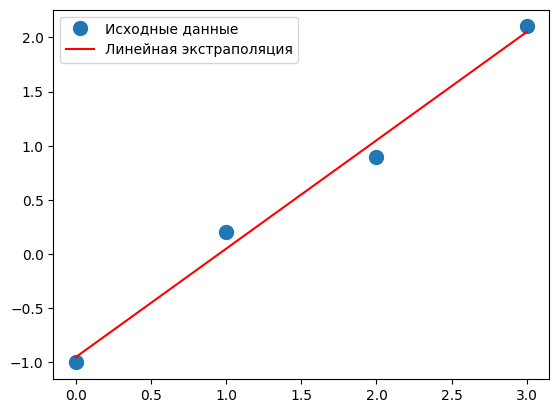

In [9]:
# Построим график полученной прямой и укажем на нем точки.

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

## **1.1.2 Пример**

**Задача:**


Пусть x,y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома a,b,c по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

**Решение:**

In [10]:
from numpy import *
from numpy.random import *
#генерируем случайние x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11)-0.5)
x += delta * (rand(11)-0.5)

# Записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [11]:
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-5.26283019 -3.8242602  -3.41202575 -2.16191645 -1.39675787  0.46746595
  1.29711456  1.954295    3.13772419  3.90902378  4.95128828]
[24.69311732 15.89240274  9.13325305  3.7693382   1.24534389  0.03419656
  0.8309277   3.71540011  8.94193954 16.2667356  24.52165675]


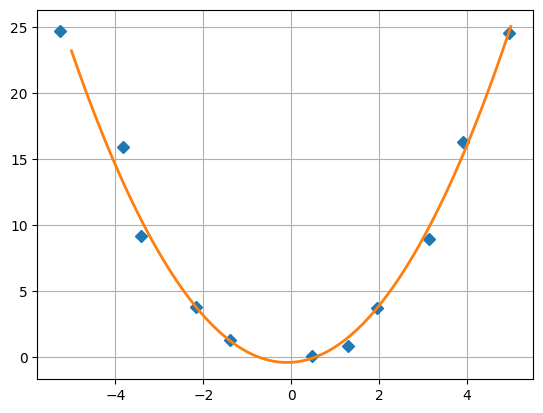

In [13]:
# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack((x**2, x,  ones(11))).T
# находим коэффициенты при составляющих вектор m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')

## **1.1.3 Пример**

**Задача:**


По данным предыдущего примера постройте эстраполяционного полинома третьего порядка.

**Решение:**

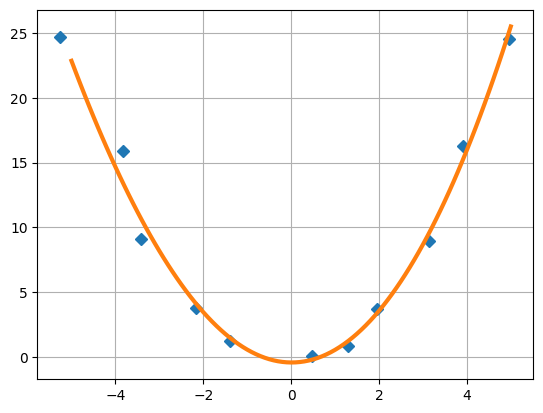

In [15]:
# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектор m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec +s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

## **Задание**

**Задача:**


Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

**Решение:**

## **1.1.4 Пример**

**Задача:**


Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида f(x,b) = b_0  + b_1 exp(-b2x^2)

**Решение:**

In [44]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

In [45]:
# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
import scipy as sp
from scipy.optimize import curve_fit

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.24742785, 0.74550688, 0.4936788 ])

In [46]:
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.00026545881252566404
0.1370888346001238


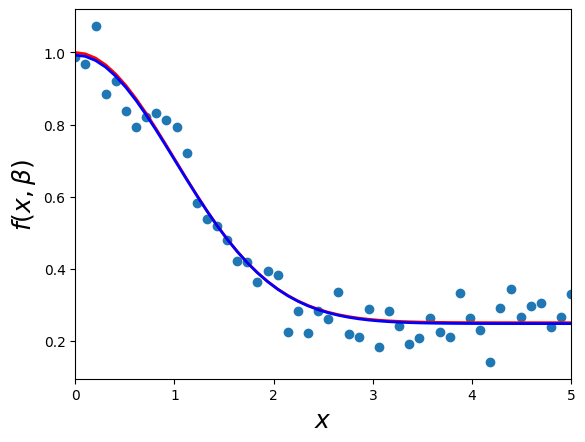

In [47]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

In [48]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.98825337 0.96875411 1.07372565 0.88447754 0.91968674 0.83762217
 0.79256196 0.82160791 0.83095621 0.81121653 0.79396558 0.72078806
 0.58167876 0.5370857  0.51903065 0.47861358 0.41992182 0.41969977
 0.36405083 0.39311796 0.38201097 0.22358253 0.28169077 0.22015422
 0.28366883 0.2610698  0.33519757 0.21807914 0.20990186 0.28757127
 0.18123285 0.28313049 0.24119759 0.18979578 0.20754004 0.26360993
 0.22550343 0.21004005 0.33170439 0.26

## **1.1.5 Пример**

**Задача:**


Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

1) f(x,b) = b_0  + b_1*x

2) f(x,b) = b_0  + b_1 x + b_2*x^2

3) f(x,b) = b_0  + b_1*ln(x)

4) f(x,b) = b_0   x^(b_1)   

<!-- b_0 - 0 - это индекс подстрочный -->


**Решение:**

[0.24777723 0.74580301]
0.00012730167281027588
0.11193767596959994


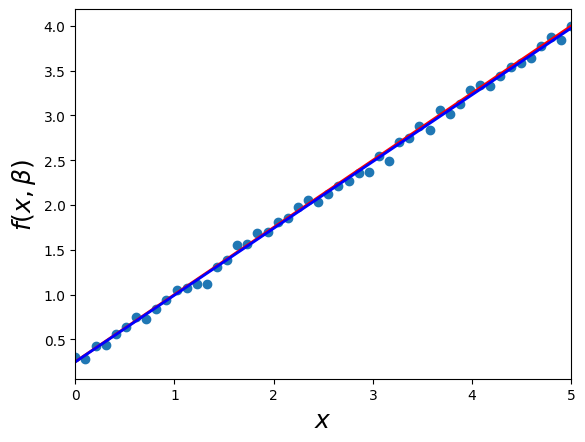

In [50]:
# 1
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[0.25421719 0.76788525 0.49588347]
0.0001260740435579327
0.10513255425963201


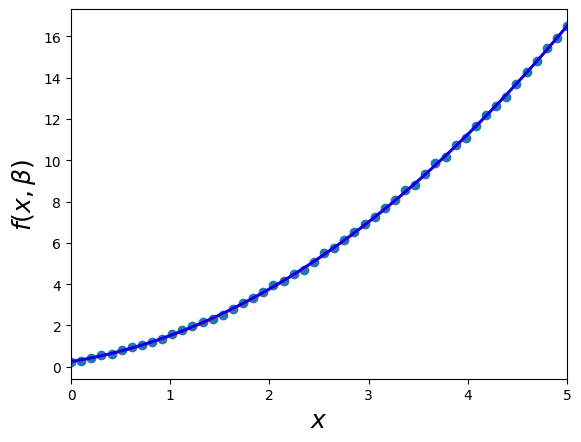

In [51]:
# 2
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[1.0259129  1.98252696]
4.993318650538085e-05
0.1154675618739413


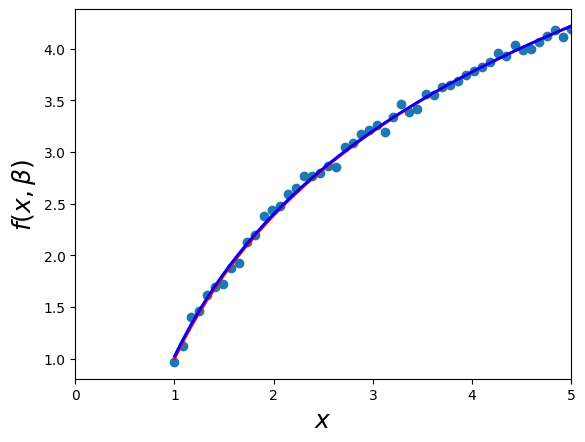

In [52]:
# 3
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[0.99600146 2.00270324]
7.025863799355853e-06
0.16955168126369025


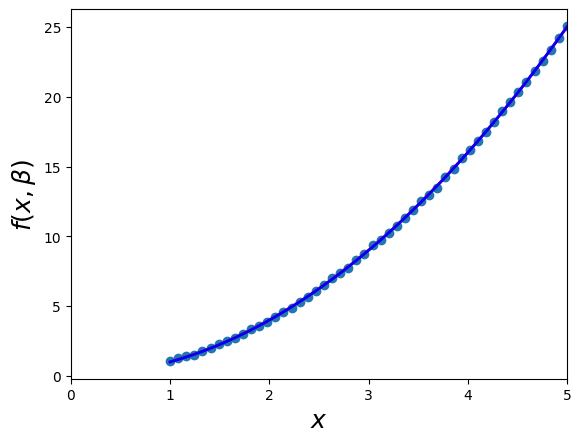

In [54]:
# 4
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
  return b0 * x ** b1
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

## **Задание**

**Задача:**


Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

**Решение:**

# **1.2. Теоретический материал – Задачи регрессии**

**Линейная регрессия** - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.



## **1.2.1 Пример**

**Задача:**


Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

**Решение:**

In [57]:
# Импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25,
                             4.50, 4.75, 5.00, 5.25, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [58]:
# Исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.962500,53.700000
std,1.581711,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.875000,58.500000
75%,4.312500,75.250000
max,5.500000,93.000000


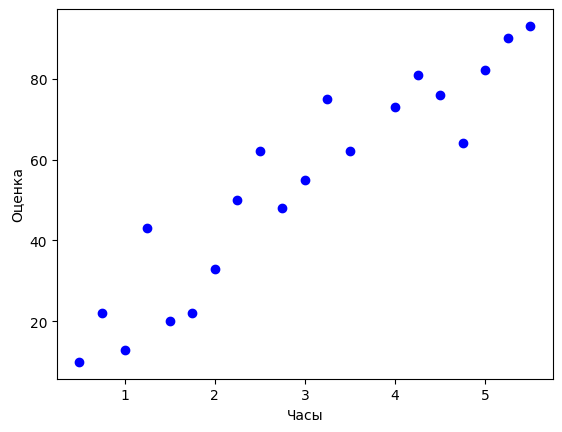

In [59]:
# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». ***Атрибуты*** – это независимые переменные, а ***метки*** – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [62]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы.
# Приведенный фрагмент разделает 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Далее можно обучить алгоритм линейной регрессии
# Необходимо импортировать класс LinearRegression, сщздать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)


[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.25]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.278881907936899
[15.96768817]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 16 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [63]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,89.109245
1,22,17.254648
2,93,93.101167
3,62,45.198102


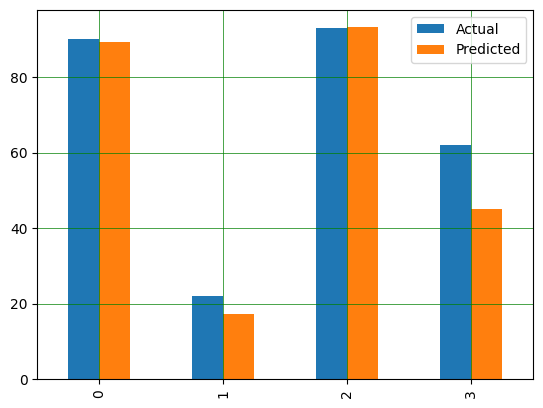

In [64]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

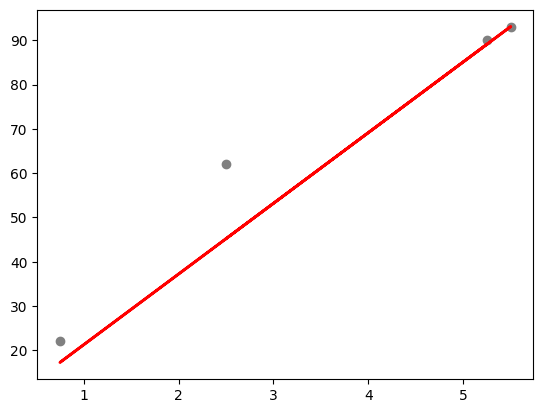

In [66]:
# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

## **Задание**

**Задача:**


Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.


**Решение:**

# **1.3. Теоретический материал – Множественная регрессия**

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. ***Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией.*** Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.



## **1.3.1 Пример**

**Задача:**


Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

**Решение:**

In [68]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
# transpose so input vectors
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond = None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


## **1.3.2 Пример**

**Задача:**


Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

**Решение:**

In [69]:
# Импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis = 1, join = "inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [70]:
# Исследуем набор данных
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [71]:
# Разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Для обучения алгорится мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [72]:
# чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [73]:
# последний шаг - оценить производительность алгорится. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343076


## **Задание**

**Задача:**


Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv


**Решение:**

## **Задание***

**Задача:**


Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО. Расчеты проводятся вручную с указанием формул, применяемых для определения коэффициентов и подробных расчетов (сдаются на листке преподавателю, письменный опрос). В тетрадке Jupyter Notebook решение реализуется методами на усмотрение студента.
Вариант выбирается по последней цифре номера студенческого билета.
Если номер заканчивается на 1, то вариант 1, на ноль – вариант 10.


**Решение:**